## Observations and Insights 

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df=pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
# Checking the number of mice.
all_mice=combined_data_df["Mouse ID"].count()
unique_mice=combined_data_df["Mouse ID"].nunique()
print(f"There is {all_mice} lines of information total, but only {unique_mice} unique mice.")


There is 1893 lines of information total, but only 249 unique mice.


In [16]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data=combined_data_df.loc[combined_data_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"]
duplicate_data


909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [17]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data_df.loc[combined_data_df["Mouse ID"]=="g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data=combined_data_df[combined_data_df["Mouse ID"]!="g989"]
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [19]:
# Checking the number of mice in the clean DataFrame.
new_unique=cleaned_data["Mouse ID"].nunique()
print(f"The new number of unique mice is {new_unique} after cleaning the data of duplicates.")

The new number of unique mice is 248 after cleaning the data of duplicates.


## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Group by the drug Regimen
drug_data=cleaned_data.groupby(["Drug Regimen"])

# Mean Tumor Vol
average_tumor=drug_data["Tumor Volume (mm3)"].mean()

# Mediam Tumor Vol
median_tumor=drug_data["Tumor Volume (mm3)"].median()

# Variance Tumor Vol
variance_tumor=drug_data["Tumor Volume (mm3)"].var()

# Standard Deviation Tumor Vol
standev_tumor=drug_data["Tumor Volume (mm3)"].std()

# SEM Tumor Vol
sem_tumor=drug_data["Tumor Volume (mm3)"].sem()

drug_statistics=pd.DataFrame({"Tumor Volume Mean (mm3)":average_tumor,
                              "Tumor Volume Median (mm3)":median_tumor,
                              "Tumor Volume Variance (mm3)":variance_tumor,
                              "Tumor Volume Standard Deviation (mm3)":standev_tumor,
                              "Tumore Volume SEM (mm3)":sem_tumor})

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_statistics


,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Variance (mm3),Tumor Volume Standard Deviation (mm3),Tumore Volume SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_analysis=cleaned_data.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
drug_analysis

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

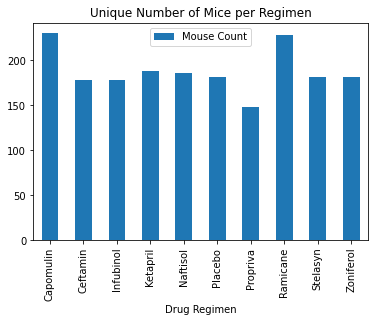

<Figure size 432x288 with 0 Axes>

In [22]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_v_drug=cleaned_data.groupby("Drug Regimen")
mice_v_drug=mice_v_drug["Mouse ID"].count().to_frame(name="Mouse Count")
mice_v_drug.plot(kind="bar")
plt.title("Unique Number of Mice per Regimen")

plt.show()
plt.tight_layout()



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

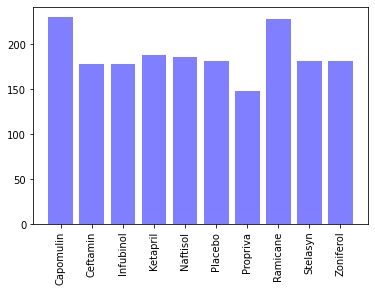

In [23]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mice_v_drug=mice_v_drug.reset_index()
plt.bar(mice_v_drug["Drug Regimen"], mice_v_drug["Mouse Count"], color='b', alpha=0.5, align="center")
plt.xticks(rotation="vertical")

<AxesSubplot:ylabel='Mouse Count'>

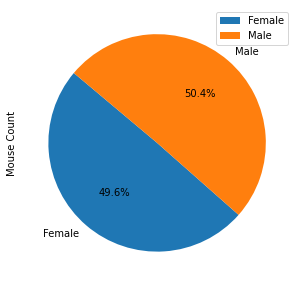

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
f_v_m=cleaned_data.groupby("Sex")
f_v_m=f_v_m["Mouse ID"].nunique().to_frame(name="Mouse Count")
f_v_m.plot.pie(y='Mouse Count',figsize=(5, 5),autopct='%1.1f%%', startangle=140)

([<matplotlib.patches.Wedge at 0x23aa98a4c88>,
 [Text(-0.7176837777416648, -0.8336246128602807, 'Female'),
  Text(0.7176837777416649, 0.8336246128602806, 'Male')],
 [Text(-0.39146387876818073, -0.45470433428742574, '49.6%'),
  Text(0.39146387876818084, 0.4547043342874257, '50.4%')])

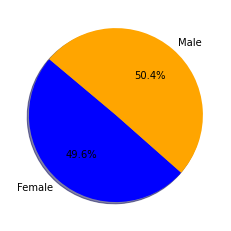

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
f_v_m=f_v_m.reset_index()


# Labels for the sections chart
labels = f_v_m["Sex"]

# The values of each section of the pie chart
sizes = f_v_m["Mouse Count"]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Tells matplotlib to seperate the "Humans" section from the others
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lastTime=cleaned_data.groupby(["Mouse ID"]).max()["Timepoint"]
lastTime

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
lastTimeVolume=pd.merge(lastTime, cleaned_data, how="left", on=("Mouse ID","Timepoint"))
lastTimeVolume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVolData=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_df=lastTimeVolume.loc[lastTimeVolume["Drug Regimen"]==drug]
    
    # add subset 
    tumorData=drug_df["Tumor Volume (mm3)"]
    
    # Determine outliers using upper and lower bound
    quartiles = tumorData.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{drug}'s outliers could be tumor volume values below {lower_bound} and above {upper_bound}.")
    
    outliers=[]
    
    #check if any data is an outlier, add to outlier list
    for x in tumorData:
        if x < lower_bound:
            outliers.append(x)
        if x > upper_bound:
            outliers.append(x)
    
    #if there are any outliers, print them, if not make note of it.
    if len(outliers)>0:
        print(f"{drug} has {len(outliers)} outlier(s). These are: {outliers}")
    else:
        print(f"{drug} has no identifiable outliers.")

Capomulin's outliers could be tumor volume values below 20.70456164999999 and above 51.83201549.
Capomulin has no identifiable outliers.
Ramicane's outliers could be tumor volume values below 17.912664470000003 and above 54.30681135.
Ramicane has no identifiable outliers.
Infubinol's outliers could be tumor volume values below 36.83290494999999 and above 82.74144559000001.
Infubinol has 1 outlier(s). These are: [36.321345799999996]
Ceftamin's outliers could be tumor volume values below 25.355449580000002 and above 87.66645829999999.
Ceftamin has no identifiable outliers.


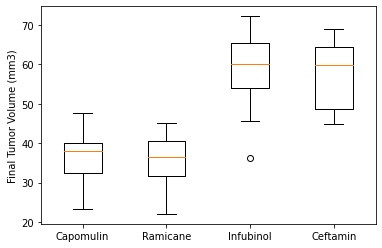

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#get final tumor volume for each of the four regimens of interest
capData_df=lastTimeVolume.loc[lastTimeVolume["Drug Regimen"]=="Capomulin"]
capData=capData_df["Tumor Volume (mm3)"] 
ramData_df=lastTimeVolume.loc[lastTimeVolume["Drug Regimen"]=="Ramicane"]
ramData=ramData_df["Tumor Volume (mm3)"]
infData_df=lastTimeVolume.loc[lastTimeVolume["Drug Regimen"]=="Infubinol"]
infData=infData_df["Tumor Volume (mm3)"]
cefData_df=lastTimeVolume.loc[lastTimeVolume["Drug Regimen"]=="Ceftamin"]
cefData=cefData_df["Tumor Volume (mm3)"]

#box plot them
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot([capData,ramData,infData,cefData],labels=treatments)
plt.show()

## Line and Scatter Plots

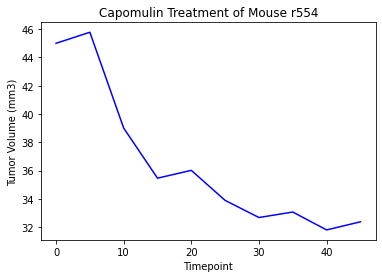

In [43]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Choose a mouse treated with Capomulin. I decided on: r554. create DF with only that ID's info
capMouse=cleaned_data.loc[cleaned_data["Mouse ID"]=="r554"]

tumorVol=capMouse["Tumor Volume (mm3)"]
timePoint=capMouse["Timepoint"]
plt.title("Capomulin Treatment of Mouse r554")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(timePoint, tumorVol, color="blue")

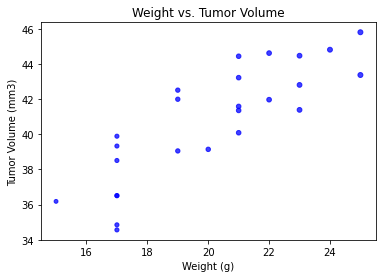

In [60]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
newCapData=cleaned_data.loc[cleaned_data["Drug Regimen"]=="Capomulin"]
newCapData=newCapData.groupby("Mouse ID")
newCap=newCapData["Weight (g)"].mean().to_frame(name="Average Weight (g)").reset_index()
volData=newCapData["Tumor Volume (mm3)"].mean().to_frame(name="Average Tumor Volume (mm3)").reset_index()
newCap=pd.merge(newCap,volData,how="left",on="Mouse ID")

weight=newCap["Average Weight (g)"]
volume=newCap["Average Tumor Volume (mm3)"]

plt.title("Weight vs. Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(weight, volume, marker="o", facecolors="blue",
            s=weight, alpha=0.75)

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The Linear Regression line equation is: y=0.95x+21.55


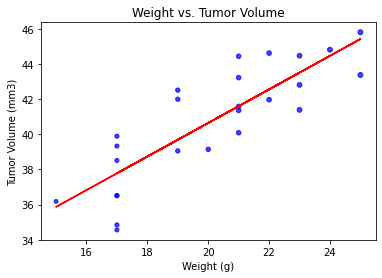

In [72]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=st.linregress(weight,volume)
correlation
slope=correlation[0]
xint=correlation[1]
corCoef=correlation[2]
lineEqn=f"y={round(slope,2)}x+{round(xint,2)}"
regressionValues=weight * slope + xint
print(f"The correlation between mouse weight and the average tumor volume is {round(corCoef,2)}")
print(f"The Linear Regression line equation is: {lineEqn}")

plt.title("Weight vs. Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(weight, volume, marker="o", facecolors="blue",
            s=weight, alpha=0.75)
plt.plot(weight,regressionValues,"r-")
